<a href="https://colab.research.google.com/github/LANZhengyang/MFML_Bayesian_KNN/blob/master/KNN_radio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from functools import reduce
import time

## KNN radio way

In [0]:
class knn_radio():
    def fit(self,X,y):
        self.X = X
        self.y=y

    def distance(self,x_1,x_2):        
        return np.linalg.norm(x_1-x_2,ord=self.X.shape[1])   

    def predict(self,x):
        field=[0,0,0] 
        for i in range(self.y.shape[0]):
            field[y[i]] += 1/(self.distance(x,self.X[i]))**self.X.shape[1]    
        return np.argmax(field)
    def cross_validation(self):
        error = 0
        for i in range(self.y.shape[0]):
          classifier_cv = knn_radio()
          Train_x=np.delete(self.X, index, axis=0)
          Train_y=np.delete(self.y, index, axis=0)
          classifier_cv.fit(Train_x,Train_y)
          for j in range(self.y.shape[0]-1):
            if classifier_cv.predict(Train_x[j]) != Train_y[j]:
              error += 1/(self.y.shape[0]-1)

        return error/self.y.shape[0]



In [0]:
  # train knn radio
  classifier = knn_radio()
  classifier.fit(X,y)


In [34]:
time_start=time.time()
print("error rate=",classifier.cross_validation())
time_end=time.time()
print('time cost',time_end-time_start,'s')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


error rate= 0.013422818791946402
time cost 42.31606912612915 s


## Original KNN

time cost 381.1704697608948 s


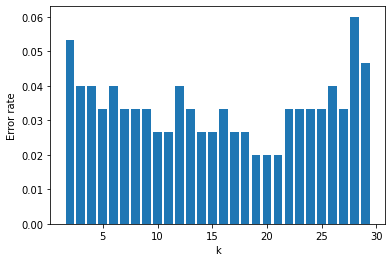

In [37]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

time_start=time.time()
all_error = []
# test k from 2 to 30
for k in range(2,30):
  sum=0
  for i in range(len(y)):
    # Do the cross validation
    Train_x=np.delete(X, i, axis=0)
    Train_y=np.delete(y, i, axis=0)
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Train_x, Train_y)
    for j in range(y.shape[0]-1):
      if neigh.predict(X[i][np.newaxis, :]) != y[i]:
        sum=sum+ 1/ (y.shape[0]-1)
  sum = sum/ (len(y))
  all_error.append(sum)

plt.bar(range(2,30),all_error)
plt.xlabel("k")
plt.ylabel("Error rate")

time_end=time.time()
print('time cost',time_end-time_start,'s')